# Talking to LLMs with Components

This is a healthcare AI agent created by Mukesh. Here, we will interact with a large language model using one of Haystack's core components: the `OpenAIChatGenerator`. This is the simplest way to talk to an LLM in Haystack and forms the foundation for the agents you'll build later in the course.

We'll send messages to the model, inspect its response, and learn how to shape the conversation by providing system instructions.

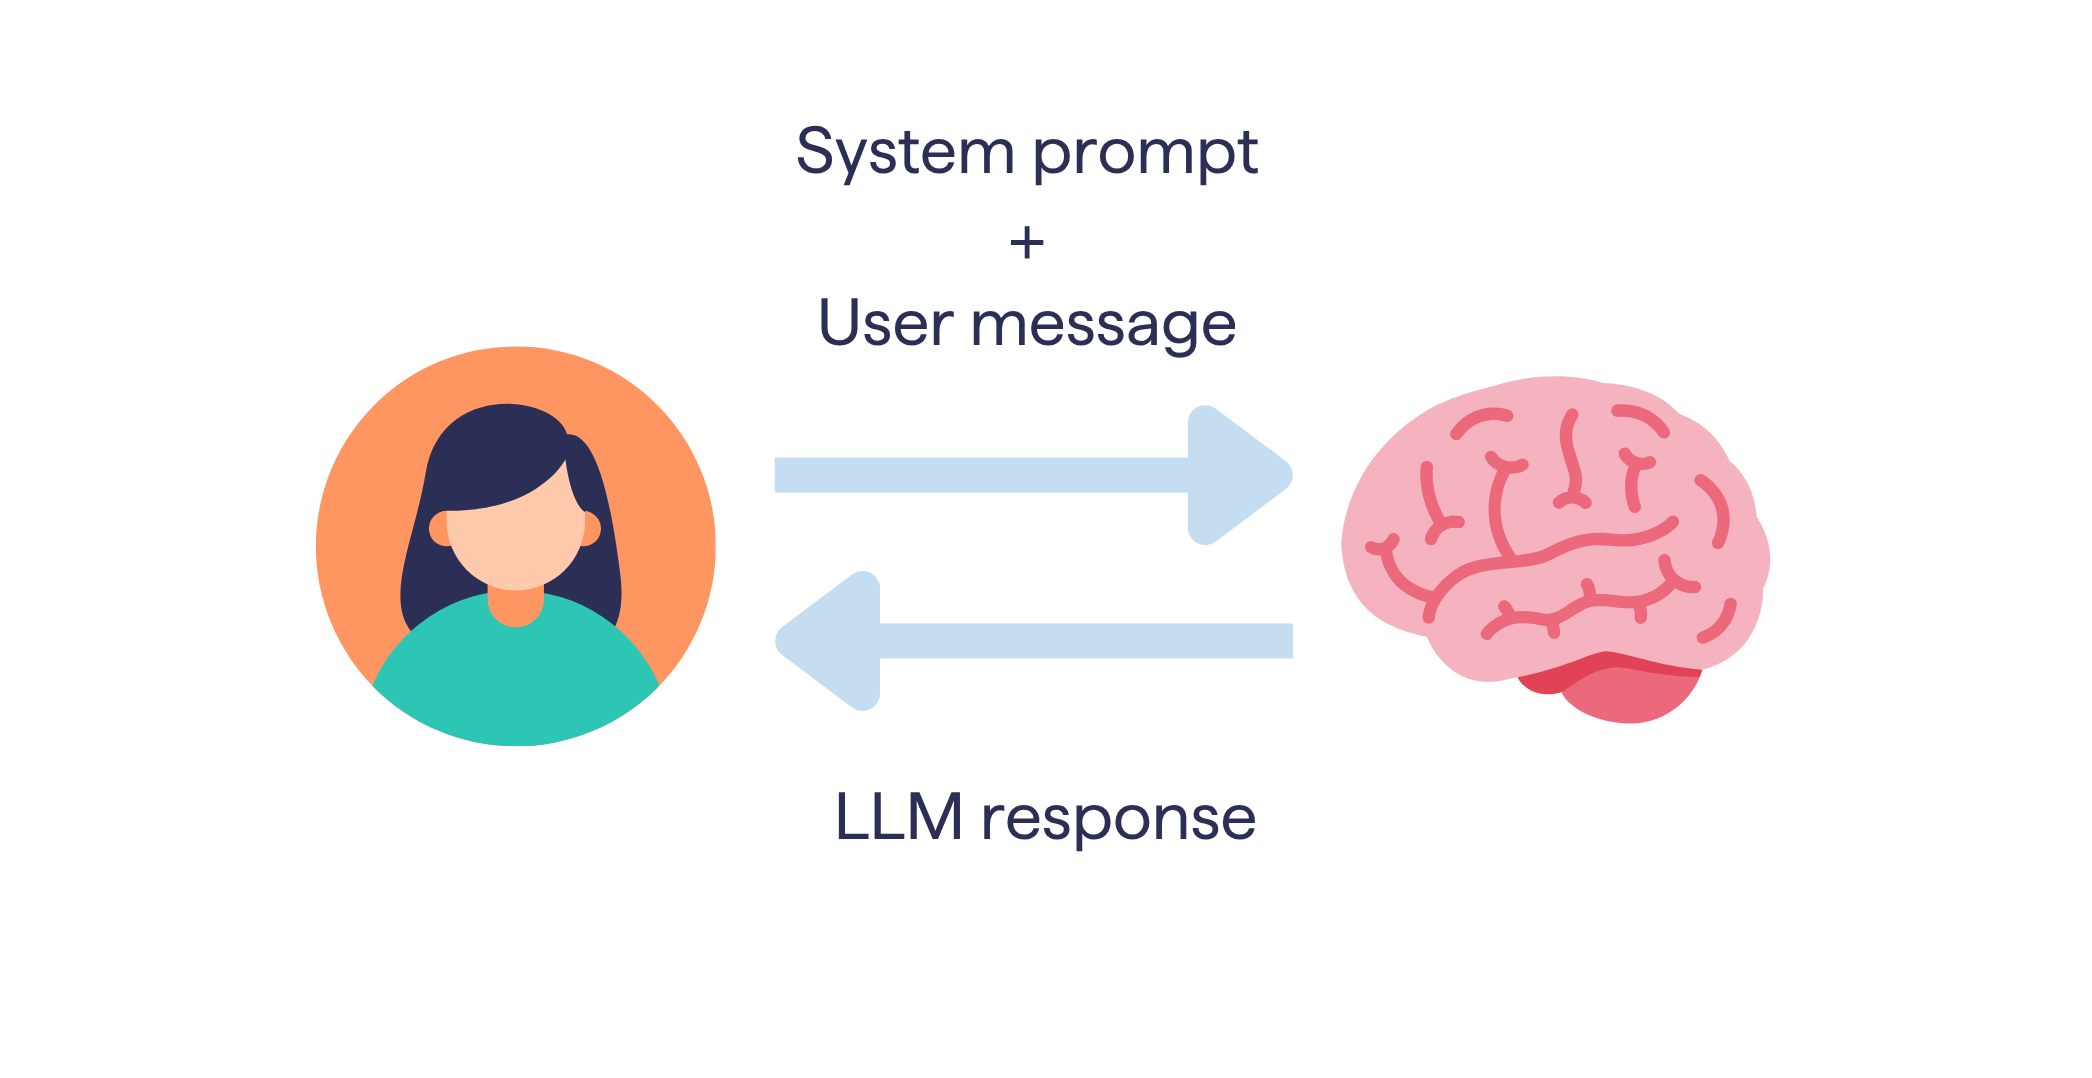

### ⚙️ Setting up Your Environment

Install the [Haystack](https://haystack.deepset.ai?utm_campaign=developer-relations&utm_source=datacamp&utm_medium=notebook) library into your DataLab.

In [1]:
!pip install -q haystack-ai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
crewai 0.30.11 requires openai<2.0.0,>=1.13.3, but you have openai 2.4.0 which is incompatible.
instructor 0.5.2 requires openai<2.0.0,>=1.1.0, but you have openai 2.4.0 which is incompatible.
langchain-openai 0.1.7 requires openai<2.0.0,>=1.24.0, but you have openai 2.4.0 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


### 💬 Initializing the Chat Generator

Import the `OpenAIChatGenerator` component and initialize it with the model you want to use. In this case, you'll use `gpt-4o-mini`, a fast and affordable OpenAI model.

In [3]:
from haystack.components.generators.chat import OpenAIChatGenerator

generator = OpenAIChatGenerator(model="gpt-4o-mini")

### 🗣️ Sending a Message to the LLM

Send a message to the model using the component's `run()` method. Lets Wrap our message with `ChatMessage.from_user()` for user input.

In [4]:
from haystack.dataclasses import ChatMessage

llm_response = generator.run(messages=[ChatMessage.from_user("What are the common side effects of hyaluronic acid?")])

### 📤 Viewing the LLM's Response

The model's response is returned as a list of `ChatMessage` objects.
Use `.text` to print the assistant's response.

In [5]:
print(llm_response["replies"][0].text)

Hyaluronic acid is widely used in various applications, including skincare products, dermal fillers, and medical treatments like joint injections. Generally, it is considered safe and well-tolerated, but some common side effects may occur, particularly when used in injectable forms or concentrated treatments. These side effects can include:

1. **Swelling**: Especially at the injection site.
2. **Redness**: Temporary redness may occur after injection.
3. **Pain or Discomfort**: Some individuals may experience mild pain at the site of injection or application.
4. **Bruising**: Injection-related bruising is possible.
5. **Itching or Rash**: Some individuals may have mild allergic reactions, leading to localized itching or rash.
6. **Dryness**: In some cases, when used in topical products, it may cause a feeling of dryness initially before it hydrates the skin.

Serious side effects are rare but can occur, particularly with injections. These can include:

- Infection at the injection site

### 💡 Adding System Instructions

We can provide additional guidance to the model using a system message. In this case, we'll tell it to keep its answer concise.

lets Use `ChatMessage.from_system()` to set the assistant's tone or behavior.


In [6]:
llm_response = generator.run(messages=[
    ChatMessage.from_system("You are a helpful AI assistant. Keep your answer concise"),
    ChatMessage.from_user("What are the common side effects of hyaluronic acid?")
])

Check the difference in the LLM's response when we include a system instruction.

In [7]:
print(llm_response["replies"][0].text)

Common side effects of hyaluronic acid, particularly when used in injections or topical formulations, may include:

1. Swelling
2. Redness
3. Pain or tenderness at the injection site
4. Itching
5. Bruising

Generally, these side effects are mild and temporary. Always consult a healthcare professional for personalized advice.
